In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Prodigy Internship/Machine Learning /Task_02/Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
X = df.iloc[:, [3,4]].values


In [ ]:
from sklearn.cluster import KMeans
wcss = []

In [ ]:
for i in range(1 , 11):
  kmeans = KMeans(n_clusters= i , init = 'k-means++' , random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

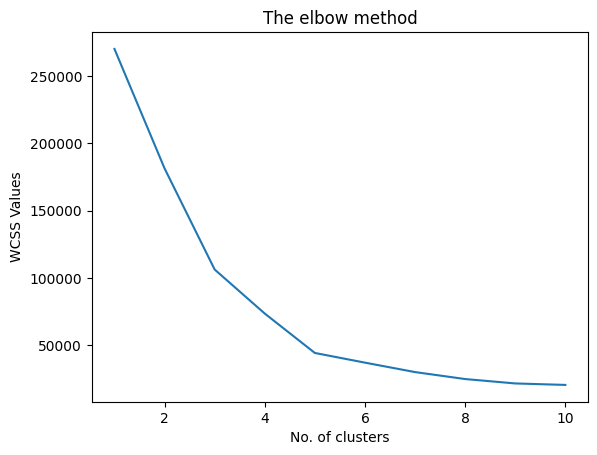

In [ ]:
plt.plot(range(1 , 11) , wcss)
plt.title ('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters = 5 , init='k-means++' , random_state=0)

In [ ]:
y_kmeans = kmeansmodel.fit_predict(X)

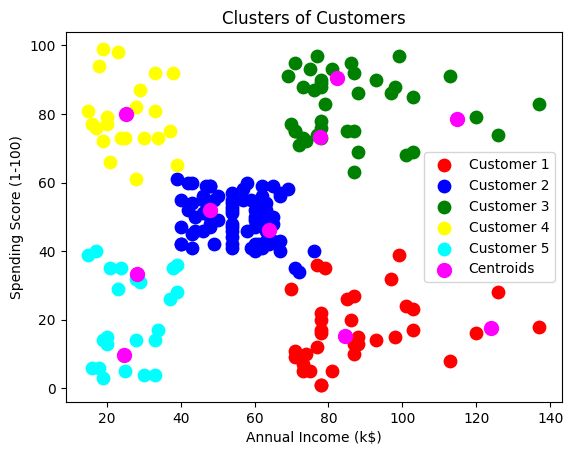

In [ ]:
plt.scatter(X[y_kmeans == 0,0] , X[y_kmeans == 0 , 1] , s=80 , c = "red" , label ='Customer 1')
plt.scatter(X[y_kmeans == 1,0] , X[y_kmeans == 1 , 1] , s=80 , c = "blue" , label ='Customer 2')
plt.scatter(X[y_kmeans == 2,0] , X[y_kmeans == 2 , 1] , s=80 , c = "green" , label ='Customer 3')
plt.scatter(X[y_kmeans == 3,0] , X[y_kmeans == 3 , 1] , s=80 , c = "yellow" , label ='Customer 4')
plt.scatter(X[y_kmeans == 4,0] , X[y_kmeans == 4 , 1] , s=80 , c = "cyan" , label ='Customer 5')

plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[:,1] , s= 100 , c = 'magenta' , label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()